# test de validation

In [24]:
%matplotlib inline
import os
import json

os.environ['USE_TORCH'] = '1'

import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor

In [53]:
def ocr_treatment(img_path):
	doc = DocumentFile.from_images(img_path)
	predictor = ocr_predictor('linknet_resnet18', pretrained=True, assume_straight_pages=False, preserve_aspect_ratio=True, det_bs=4, reco_bs=1024)
	result = predictor(doc)
	return result

def ocr_display(result):
	synthetic_pages = result.synthesize()
	plt.figure(figsize=(15, 15))
	plt.imshow(synthetic_pages[0]); plt.axis('off'); plt.show()
	
	
def extract_text_blocks(json_data):
    text_blocks = []
    for page in json_data["pages"]:
        for block in page["blocks"]:
            text = ""
            for line in block["lines"]:
                for word in line["words"]:
                    text += word["value"] + " "
            text_blocks.append(text.strip())
    return text_blocks


def ocr_display_text(result):
	json_data = result.export()
	text_blocks = extract_text_blocks(json_data)
	for i, block in enumerate(text_blocks, start=1):
		print(f"Block {i}: {block}")
	
	
def save_json(result):
	with open('result.json', 'w') as f:
		f.write(json.dumps(result.export()))

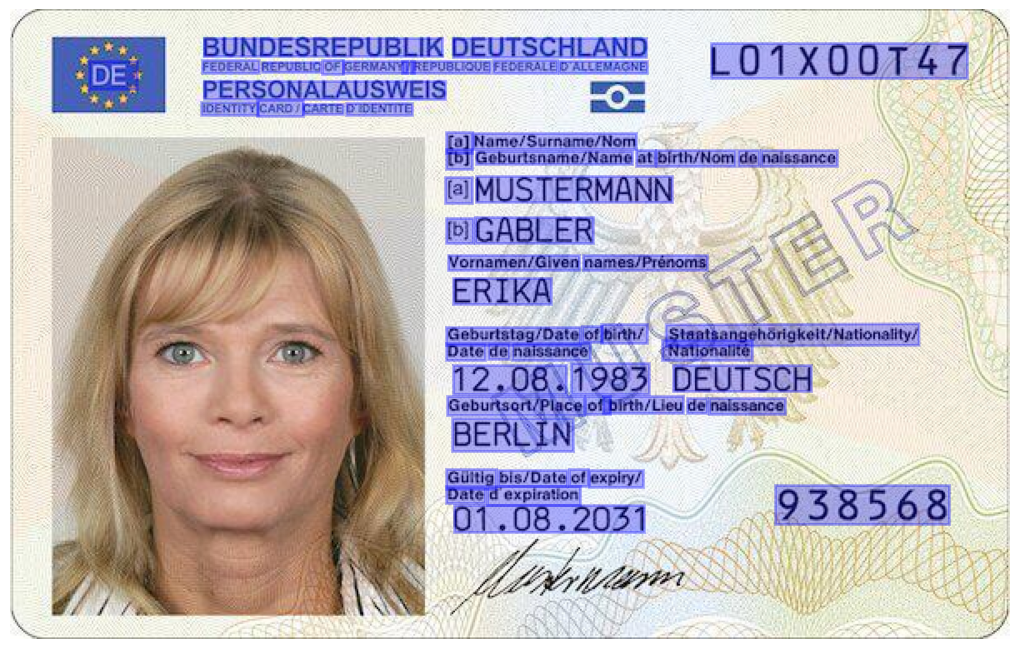

Block 1: BUNDESREPUBLIK DEUTSCHLAND FEDERAL MEPUBLC OF GERMANY 1. REPUBLIOUE FEDERALE 3NDVWSYV.0
Block 2: L01X00T47
Block 3: DE
Block 4: PERSONALALAUSWEIS IDENTITY CARDI CARE DIDENTITE
Block 5: [a) Name/Surname/Nom
Block 6: [b) Geburtsname/Name at birth/Nom de naissance
Block 7: (a] MUSTERMANN [b) GABLER
Block 8: Vornamen/Given names/Prénoms
Block 9: ERIKA
Block 10: Geburtstag/Date of birth/ /ASUOPeN/IPAOVgweduvsuns
Block 11: Date de naissance
Block 12: Nationalité
Block 13: 12.08. 1983 DEUTSCH Geburtsen/Place of birth/Lieu de naissance
Block 14: BERLIN
Block 15: Gultig bis/Date of expiry/ Date d'expiration 01.08.2031
Block 16: 938568
BUNDESREPUBLIK DEUTSCHLAND
FEDERAL MEPUBLC OF GERMANY 1. REPUBLIOUE FEDERALE 3NDVWSYV.0

L01X00T47

DE

PERSONALALAUSWEIS
IDENTITY CARDI CARE DIDENTITE

[a) Name/Surname/Nom

[b) Geburtsname/Name at birth/Nom de naissance

(a] MUSTERMANN
[b) GABLER

Vornamen/Given names/Prénoms

ERIKA

Geburtstag/Date of birth/ /ASUOPeN/IPAOVgweduvsuns

Date de naissance


TypeError: Object of type ndarray is not JSON serializable

In [55]:
img_path = 'img02.jpg'
result = ocr_treatment(img_path)
result.show()
#ocr_display(result)
ocr_display_text(result)
text_output = result.render()
print(text_output)
save_json(result)